In [37]:
% matplotlib notebook

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [39]:
drop_out_to_load="Dropouts.csv"
dropout_csv=pd.read_csv(drop_out_to_load)
dropout_df=pd.DataFrame(dropout_csv)
dropout_df=dropout_df[["COUNTY_NAME","DISTRICT_ID","DISTRICT_NAME","GRADE_LEVEL","GRADE_NAME","ROW_TOTAL"]]
dropout_df["DISTRICT_NAME"] = dropout_df["DISTRICT_NAME"].apply(lambda x: x.split()[0])
dropout_data = dropout_df[dropout_df["DISTRICT_NAME"].isin(["SUMMIT","PRINCETON","CLIFTON","BRIDGETON","HOBOKEN"  ])]
dropout_data=dropout_data[dropout_data["GRADE_NAME"]=="TOTAL"].copy()
bridgtondropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="BRIDGETON"]
bridgtondropout_data=bridgtondropout_data[bridgtondropout_data["ROW_TOTAL"]== max(bridgtondropout_data["ROW_TOTAL"])]
bridgtondropout_data


,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
1418,CUMBERLAND,540,BRIDGETON,55,TOTAL,121


In [40]:
princetondropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="PRINCETON"]
princetondropout_data=princetondropout_data[princetondropout_data["ROW_TOTAL"]== max(princetondropout_data["ROW_TOTAL"])]
princetondropout_data=princetondropout_data.drop_duplicates(keep='last')
princetondropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
2750,MERCER,4255,PRINCETON,55,TOTAL,4


In [41]:
summitdropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="SUMMIT"]
summitdropout_data=summitdropout_data[summitdropout_data["ROW_TOTAL"]== max(summitdropout_data["ROW_TOTAL"])]
summitdropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
5023,UNION,5090,SUMMIT,55,TOTAL,4


In [42]:
hobokendropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="HOBOKEN"]
hobokendropout_data=hobokendropout_data[hobokendropout_data["ROW_TOTAL"]== max(hobokendropout_data["ROW_TOTAL"])]
hobokendropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
2342,HUDSON,2210,HOBOKEN,55,TOTAL,56


In [43]:
cliftondropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="CLIFTON"]
cliftondropout_data=cliftondropout_data[cliftondropout_data["ROW_TOTAL"]== max(cliftondropout_data["ROW_TOTAL"])]
cliftondropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
3924,PASSAIC,900,CLIFTON,55,TOTAL,107


In [44]:
finaldropout_data=bridgtondropout_data.append(princetondropout_data).append(summitdropout_data).append(hobokendropout_data).append(cliftondropout_data)
finaldropout_data=finaldropout_data.rename(columns={"COUNTY_NAME":"COUNTY","ROW_TOTAL":"TOTAL DROPOUTS"})

finaldropout_data



,COUNTY,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,TOTAL DROPOUTS
1418,CUMBERLAND,540,BRIDGETON,55,TOTAL,121
2750,MERCER,4255,PRINCETON,55,TOTAL,4
5023,UNION,5090,SUMMIT,55,TOTAL,4
2342,HUDSON,2210,HOBOKEN,55,TOTAL,56
3924,PASSAIC,900,CLIFTON,55,TOTAL,107


In [45]:
#Select the required columns
finaldropout_data =finaldropout_data[["DISTRICT_NAME","TOTAL DROPOUTS"]]
finaldropout_data = finaldropout_data.rename(columns={"DISTRICT_NAME":"City","TOTAL DROPOUTS":"Total_Dropout"})
finaldropout_data = finaldropout_data.sort_values(by="City",ascending=False)
finaldropout_data

,City,Total_Dropout
5023,SUMMIT,4
2750,PRINCETON,4
2342,HOBOKEN,56
3924,CLIFTON,107
1418,BRIDGETON,121


<IPython.core.display.Javascript object>


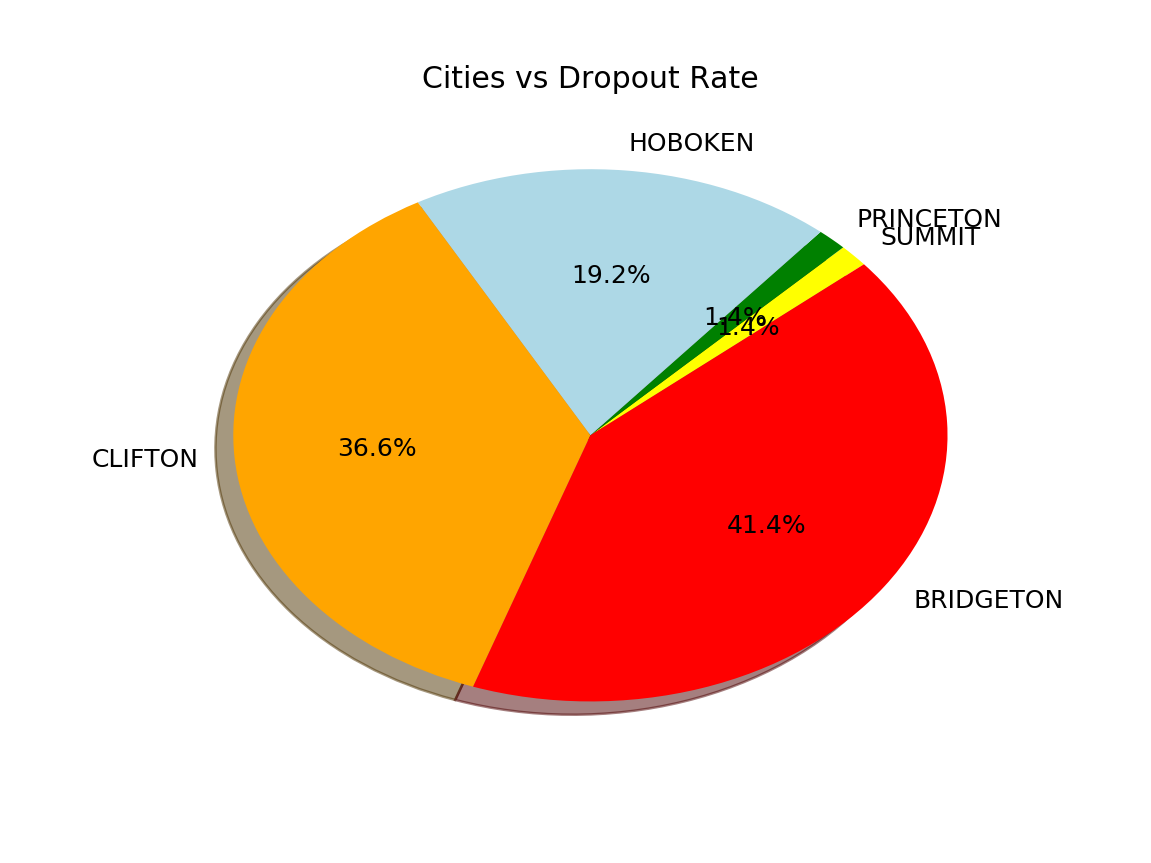

In [46]:
colors = ["yellow","green","lightblue","orange","red"]
plt.title("Cities vs Dropout Rate")
plt.pie(finaldropout_data["Total_Dropout"], labels=finaldropout_data["City"], colors=colors,autopct="%1.1f%%",
        startangle=40,shadow=True)
    

plt.show()
plt.savefig("../graph/dropout_pies.png")


